<a href="https://colab.research.google.com/github/EricFergs/HRV-Analysis/blob/main/Plottingpractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy import interpolate
import os
import pandas as pd
import matplotlib.pyplot as plt
import gc
import glob

In [ ]:
with open("NS03a.24h", 'rb') as f:
  list = []
  for s in f.readlines():
      try:
          list.append(float(str(s.strip(), 'utf-8')))
      except ValueError:
          print("ValueError occured")

Text(0.5, 1.0, 'Raw 24h HRV data of CHF patient')

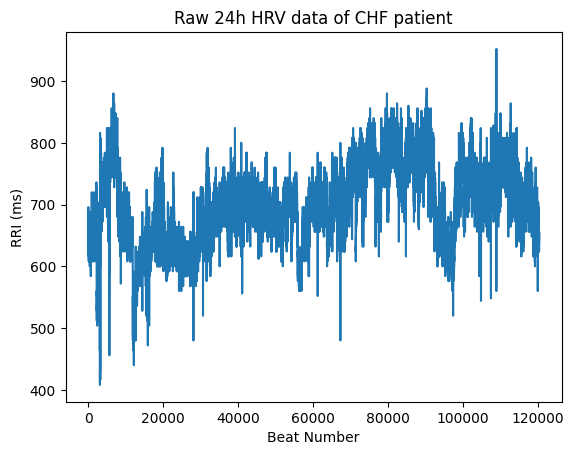

In [ ]:
hrv = pd.DataFrame(list)

plt.plot(hrv)
plt.xlabel('Beat Number')
plt.ylabel('RRI (ms)')
plt.title('Raw 24h HRV data of CHF patient')

In [ ]:
hrv[0] = pd.to_numeric(hrv[0], 'coerce').interpolate()
hrv['Time'] = pd.to_datetime(hrv[0].cumsum(), unit='ms', errors='coerce')
hrv = hrv.set_index('Time')
hrv

,0
Time,
1970-01-01 00:00:00.648,648.0
1970-01-01 00:00:01.304,656.0
1970-01-01 00:00:01.936,632.0
1970-01-01 00:00:02.616,680.0
1970-01-01 00:00:03.296,680.0
...,...
1970-01-01 23:19:22.160,640.0
1970-01-01 23:19:22.808,648.0
1970-01-01 23:19:23.448,640.0


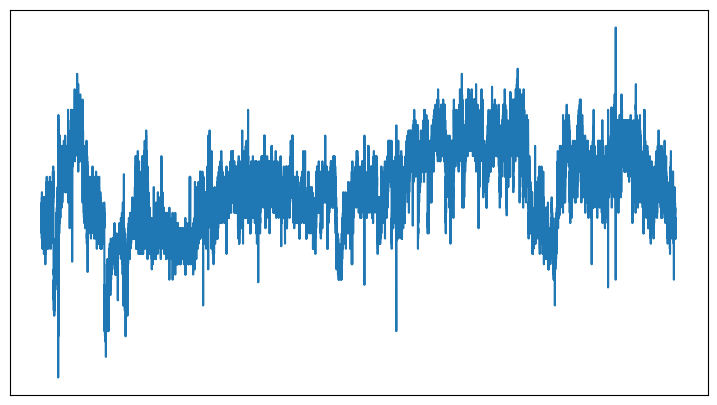

In [ ]:
threshold_min = 350
threshold_max = 1300


# Replace values off the range by NaN
hrv[(hrv <= threshold_min) | (hrv >= threshold_max)] = np.NaN

# ----- Differences ------- #
# This is the maximum allowed difference between points in percentages
max_difference = 0.2

# Calculate the distance between successive points and save it as a column
hrv['dRRI'] = (hrv[0].diff().fillna(0)).abs()

# Calculate the percentage of change between the points
thresholds = hrv.dRRI/hrv[0]
# Replace values with a larger difference with NaN
hrv.iloc[thresholds > max_difference, 0] = np.NaN

# Alternatively, you can set an absolute maximum difference by running the command below
# instead of the two commands above
# hrv[hrv.dRRI > max_threshold] = np.NaN

# ---- Finishing ----- #
# Now that the outliers were removed, we replace them by interpolating the data
interpolation_method = 'linear' # Could be 'spline' or anything else
hrv = hrv.interpolate(method=interpolation_method).drop(columns='dRRI')

slivcehrv = hrv.iloc[:int(len(hrv)*(1/10))]
plt.figure(figsize=(9,5))
plt.plot(hrv.values)
plt.xticks([])  # Turn off x labels
plt.yticks([])  # Turn off y labels (if needed)

#plt.xlabel('Beat Number')
#plt.ylabel('RRI (ms)')
#plt.title('HRV data of CHF patient')
plt.axis = False
plt.savefig('HRV.png')

Text(0.5, 1.0, 'HRV data of CHF patient')

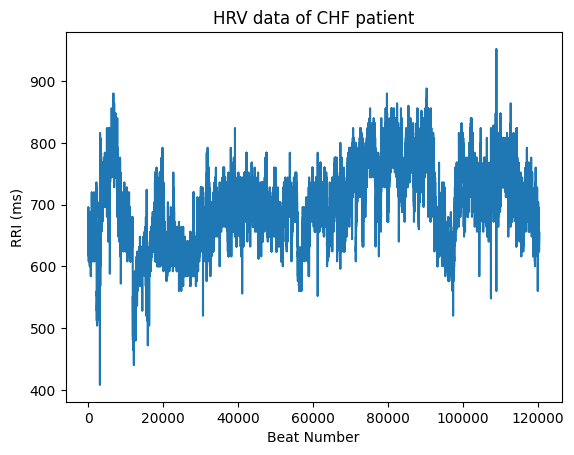

In [ ]:
threshold_min = 350
threshold_max = 1300


# Replace values off the range by NaN
hrv[(hrv <= threshold_min) | (hrv >= threshold_max)] = np.NaN

# ----- Differences ------- #
# This is the maximum allowed difference between points in percentages
max_difference = 0.2
n_repetitions = 10

for i in range(n_repetitions):
    # Calculate the distance between successive points and save it as a column
    hrv['dRRI'] = (hrv[0].diff().fillna(0)).abs()

    # Calculate the percentage of change between the points
    thresholds = hrv.dRRI/hrv[0]
    # Replace values with a larger difference with NaN
    hrv.iloc[thresholds > max_difference, 0] = np.NaN

    # ---- Finishing ----- #
    # Now that the outliers were removed, we replace them by interpolating the data
    interpolation_method = 'linear' # Could be 'spline' or anything else
    hrv = hrv.interpolate(method=interpolation_method).drop(columns='dRRI')


plt.plot(hrv.values)
plt.xlabel('Beat Number')
plt.ylabel('RRI (ms)')
plt.title('HRV data of CHF patient')

In [ ]:
target_rp_size = 384  # Target size for recurrence plot

# Reset index for downsampling
coarse_grained_hrv = hrv.reset_index()

# Calculate the downsampling factor
downsampling_factor = int(np.ceil(len(coarse_grained_hrv) / target_rp_size))

# Downsample the data by taking the mean within each segment
coarse_grained_hrv = hrv.groupby(coarse_grained_hrv.index // downsampling_factor).mean()

coarse_grained_hrv.reset_index(inplace=True)

# Reassign datetime index
coarse_grained_hrv.set_index('index', inplace=True)
hrv2 = hrv
hrv = coarse_grained_hrv

Text(0.5, 1.0, 'Filtered 24h HRV data of CHF patient')

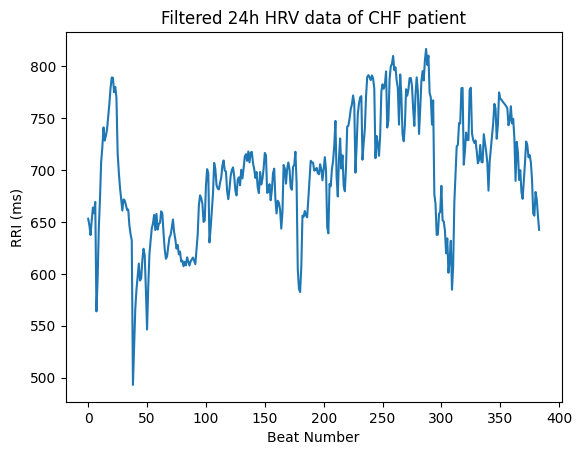

In [ ]:
plt.plot(hrv.values)
plt.xlabel('Beat Number')
plt.ylabel('RRI (ms)')
plt.title('Filtered 24h HRV data of CHF patient')

In [ ]:
len(hrv)

384

In [ ]:
!pip install pyts
from pyts.image import RecurrencePlot
from pyts.image import GramianAngularField

In [ ]:
clean_hrv = hrv.to_numpy().flatten()
clean_hrv

array([653.14649682, 646.9044586 , 637.37579618, 651.6433121 ,
       663.92356688, 658.44585987, 669.32484076, 563.87261146,
       595.08280255, 643.36305732, 672.13375796, 707.79617834,
       721.8089172 , 741.14649682, 728.48407643, 732.94267516,
       739.10828025, 751.2866242 , 764.15286624, 779.36305732,
       789.32484076, 788.96815287, 775.03184713, 780.15286624,
       769.57961783, 716.78980892, 697.96178344, 683.2866242 ,
       672.33121019, 661.01910828, 671.74522293, 670.80254777,
       666.62420382, 661.47770701, 661.93630573, 646.57324841,
       638.34394904, 632.30573248, 492.99363057, 530.1910828 ,
       566.34394904, 584.89171975, 597.4522293 , 609.93630573,
       593.60509554, 595.61783439, 613.40127389, 624.20382166,
       618.01273885, 584.57961783, 546.39490446, 587.61783439,
       618.49681529, 631.89808917, 643.94904459, 648.63694268,
       656.76433121, 642.26751592, 657.88535032, 642.72611465,
       648.25477707, 649.12101911, 660.26751592, 657.96

In [ ]:
hrv_data = clean_hrv.reshape(1, -1)
hrv_data
gc.collect()

100

In [ ]:
if hrv_data.dtype != np.float32:
    hrv_data = hrv_data.astype(np.float32)
    print(f'Data type after conversion: {hrv_data.dtype}')

Data type after conversion: float32


In [ ]:
def process_and_save_chunks(data, chunk_size, file_prefix):
    rp = RecurrencePlot(threshold='point', percentage=20)
    num_chunks = int(np.ceil(data.shape[1] / chunk_size))
    padded_length = num_chunks * chunk_size

    # Pad the data to make it evenly divisible by chunk_size
    padded_data = np.pad(data, ((0, 0), (0, padded_length - data.shape[1])), mode='constant', constant_values=0)

    # Process each chunk
    for i in range(0, padded_data.shape[1], chunk_size):
        chunk = padded_data[0, i:i + chunk_size].reshape(1, -1)
        recurrence_plot = rp.transform(chunk)

        # Save the recurrence plot to disk
        np.save(f'{file_prefix}_chunk_{i//chunk_size}.npy', recurrence_plot)

        # Clear variables and collect garbage
        del chunk, recurrence_plot
        gc.collect()

In [ ]:
chunk_size = 128  # Adjust chunk size as needed
process_and_save_chunks(hrv_data, chunk_size, 'recurrence_plot')


In [ ]:
def load_and_combine_chunks(file_prefix, chunk_size, combined_file_name, load_half=False):
    # Get a list of all chunk files
    chunk_files = sorted(glob.glob(f'{file_prefix}_chunk_*.npy'))

    # Optionally load only half of the chunk files
    if load_half:
        chunk_files = chunk_files[:len(chunk_files) // 4]

    # Load each chunk and concatenate
    recurrence_plots = [np.load(chunk_file) for chunk_file in chunk_files]
    combined_recurrence_plot = np.concatenate(recurrence_plots, axis=1)

    # Save the combined recurrence plot to disk
    np.save(combined_file_name, combined_recurrence_plot)

    # Clear individual recurrence plots from memory
    for recurrence_plot in recurrence_plots:
        del recurrence_plot
    gc.collect()  # Garbage collect to free up memory

    return combined_recurrence_plot

#combined_file_name = 'combined_recurrence_plot.npy'
#combined_recurrence_plot = load_and_combine_chunks('recurrence_plot', chunk_size, combined_file_name, load_half = True)


In [ ]:
recurrence_plot = np.load('recurrence_plot_chunk_0.npy')

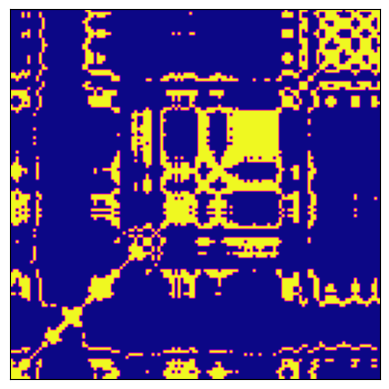

In [ ]:
plt.imshow(recurrence_plot[0], cmap='plasma', origin='lower')
#plt.title('Recurrence Plot')

plt.xticks([])  # Turn off x labels
plt.yticks([])  # Turn off y labels (if needed)

plt.axis = False

plt.savefig('Recurrence.png')
plt.show()

In [ ]:
import numpy as np
from pyts.image import GramianAngularField

def process_and_save_chunks(data, chunk_size, file_prefix, method='d'):
    transformer = GramianAngularField(method=method, image_size=chunk_size)

    num_chunks = int(np.ceil(data.shape[1] / chunk_size))
    padded_length = num_chunks * chunk_size

    # Pad the data to make it evenly divisible by chunk_size
    padded_data = np.pad(data, ((0, 0), (0, padded_length - data.shape[1])), mode='constant', constant_values=0)

    # Process each chunk
    for i in range(0, padded_data.shape[1], chunk_size):
        chunk = padded_data[:, i:i + chunk_size]

        # Transform chunk into Gramian Angular Field
        gaf_image = transformer.fit_transform(chunk)

        # Save the GAF image to disk
        np.save(f'{file_prefix}_{method}_chunk_{i//chunk_size}.npy', gaf_image)

        # Clear variables and collect garbage
        del chunk, gaf_image
        gc.collect()

# Example usage:
# Assuming 'hrv_data' is your time series data of shape (n_samples, n_features)
# process_and_save_chunks(hrv_data, chunk_size=100, file_prefix='data_gaf', method='s')


In [ ]:
process_and_save_chunks(hrv_data, chunk_size=128, file_prefix='data_gaf', method='s')

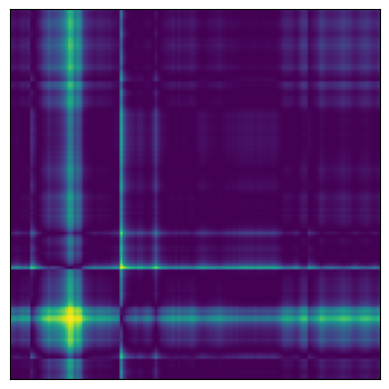

In [ ]:
gaf_plot = np.load('data_gaf_s_chunk_0.npy')
plt.imshow(gaf_plot[0], cmap='viridis', origin='lower')
#plt.title('GAF Plot')
plt.xticks([])  # Turn off x labels
plt.yticks([])  # Turn off y labels (if needed)

plt.axis = False
plt.savefig('GAF.png')
plt.show()


In [ ]:
def third_order_cumulant(x, max_lag):
    n = len(x)
    cumulant = np.zeros((2 * max_lag + 1, 2 * max_lag + 1))

    for tau1 in range(-max_lag, max_lag + 1):
        for tau2 in range(-max_lag, max_lag + 1):
            if tau1 >= 0 and tau2 >= 0:
                cumulant[tau1 + max_lag, tau2 + max_lag] = np.mean(x[:n - max(tau1, tau2)] * x[tau1:n - max(tau1, tau2)] * x[tau2:n - max(tau1, tau2)])
            elif tau1 < 0 and tau2 >= 0:
                cumulant[tau1 + max_lag, tau2 + max_lag] = np.mean(x[-tau1:n - tau2] * x[:n + tau1 - tau2] * x[tau2:n - tau2])
            elif tau1 >= 0 and tau2 < 0:
                cumulant[tau1 + max_lag, tau2 + max_lag] = np.mean(x[:n + tau2 - tau1] * x[tau1:n + tau2 - tau1] * x[-tau2:n - tau1])
            else:
                cumulant[tau1 + max_lag, tau2 + max_lag] = np.mean(x[-tau1:n + tau2] * x[:n + tau2 + tau1] * x[-tau2:n + tau1])

    return cumulant



In [ ]:
print(len(hrv_data[0]))

384


96


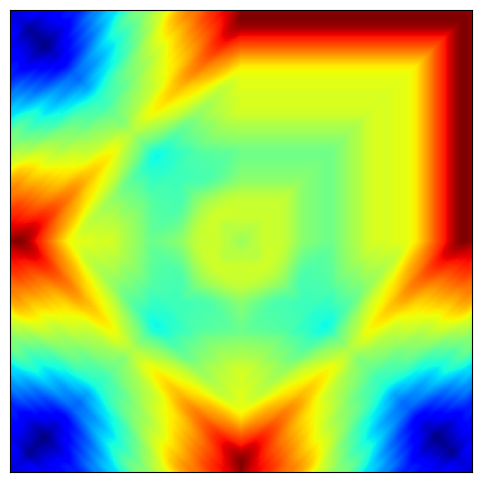

In [ ]:
max_lag = int(len(hrv)/4)
print(max_lag)
cumulant = third_order_cumulant(hrv,max_lag)

# Plot the 3rd-order cumulant
plt.figure(figsize=(8, 6))
plt.imshow(cumulant, extent=[-max_lag, max_lag, -max_lag, max_lag], origin='lower', cmap='jet')
#plt.title('3rd-Order Cumulant')
#plt.colorbar()
#plt.xlabel('Lag 1')
#plt.ylabel('Lag 2')
plt.xticks([])  # Turn off x labels
plt.yticks([])  # Turn off y labels (if needed)

plt.axis = False

plt.savefig('3rdorder.png')
plt.show()